In [2]:
# Ingest the data and perform some basic analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
df = pd.read_csv('data/gemstone.csv')

In [4]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
df.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
172826,172826,0.30,Premium,D,VS1,61.4,58.0,4.28,4.31,2.64,608
93874,93874,0.72,Ideal,H,VS1,62.4,57.0,5.73,5.76,3.58,2400
176679,176679,0.70,Ideal,J,SI1,62.7,57.0,5.68,5.61,3.54,1949
67263,67263,0.31,Ideal,G,VS2,61.8,55.0,4.35,4.38,2.70,544
104436,104436,0.95,Premium,H,SI2,60.4,61.0,6.35,6.27,3.81,2827


In [6]:
# check missing values
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
# complete info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [8]:
# remove id frm the data
df.drop('id', axis=1, inplace=True)

In [9]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [10]:
# checck duplicated values
df.duplicated().sum()

0

In [11]:
# check row and ccolumns
df.shape

(193573, 10)

In [12]:
# segregate the data into numerical and categorical
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(exclude=np.number)


In [13]:
df_cat.describe().T

,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


In [14]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [15]:
# check value counts for categorical data witth total count of caattgorical data
for col in df_cat.columns:
    print(df_cat[col].value_counts())
    print(df_cat[col].value_counts().sum())
    print()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
193573

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
193573

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
193573



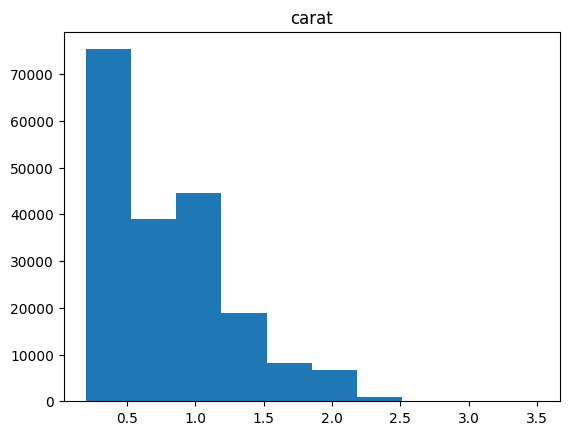

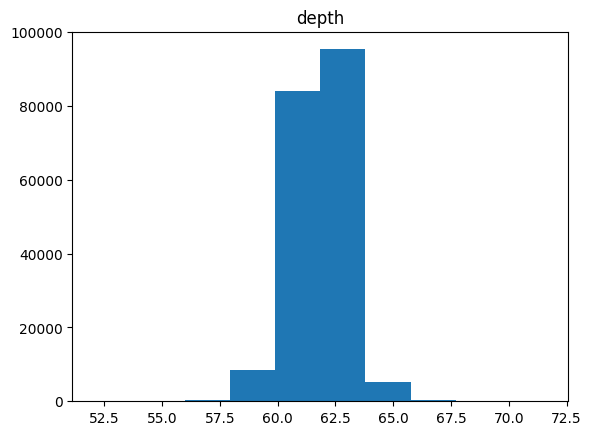

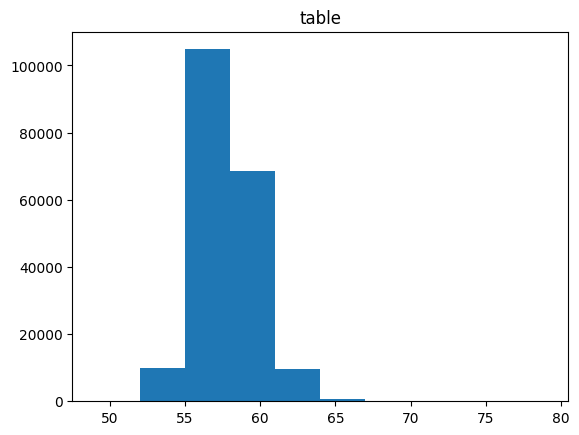

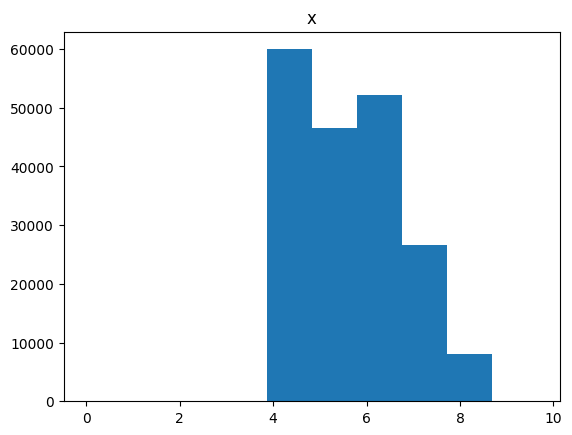

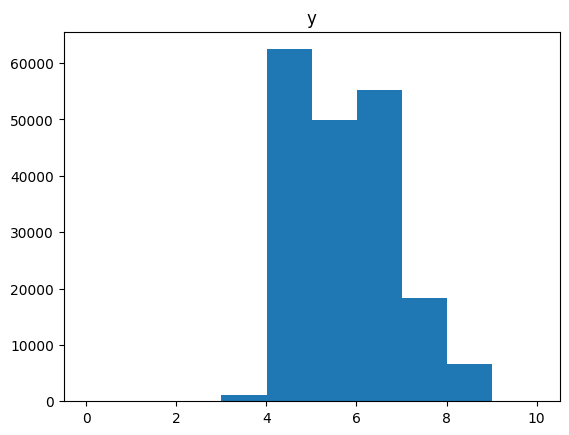

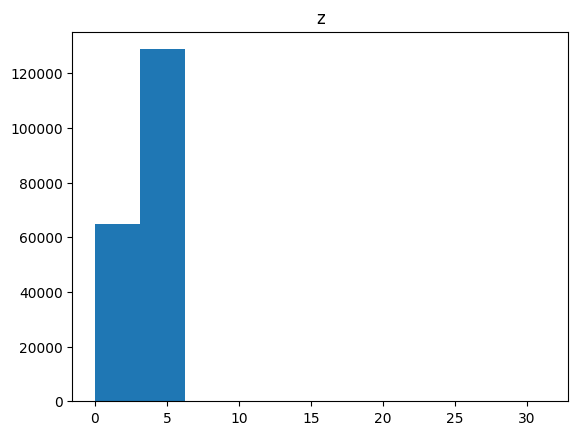

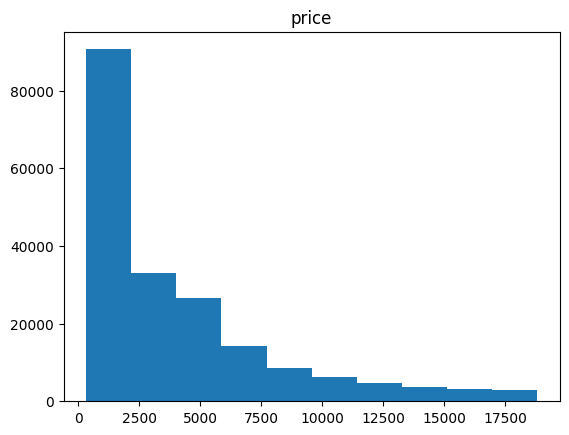

In [16]:
# histtoogram for numerical data
for col in df_num.columns:
    plt.hist(df_num[col])
    plt.title(col)
    plt.show()

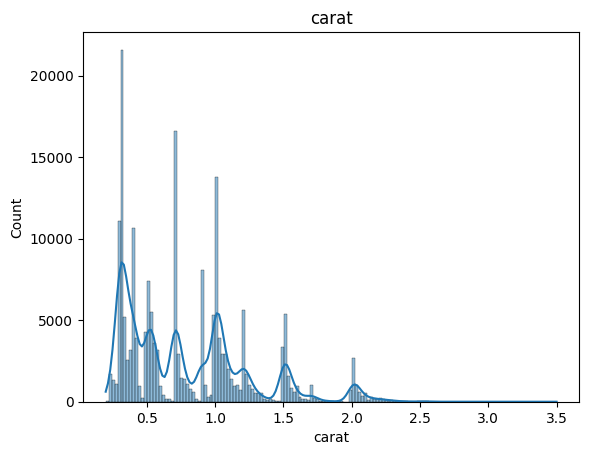

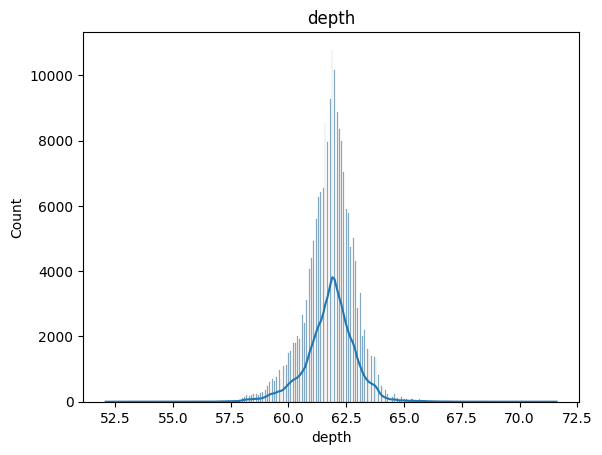

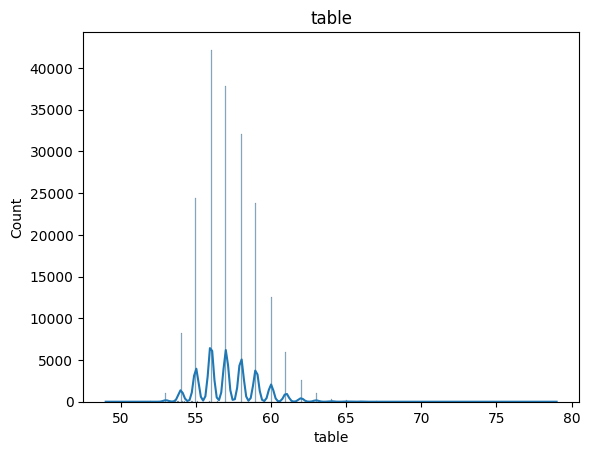

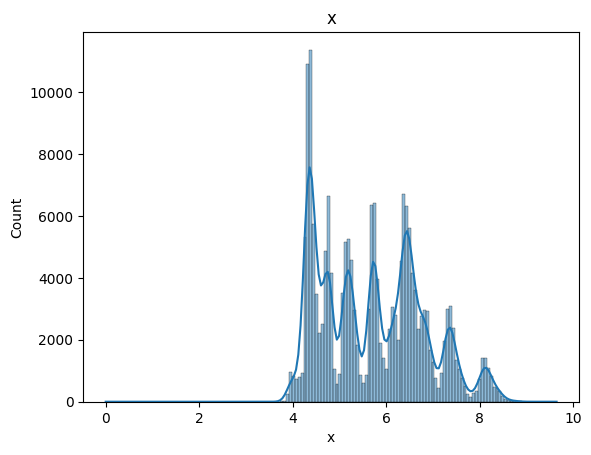

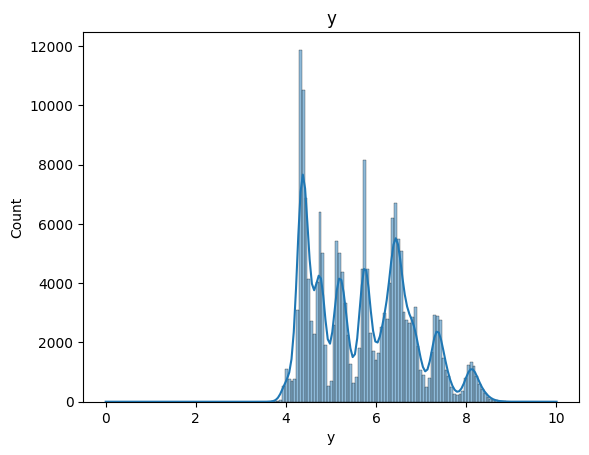

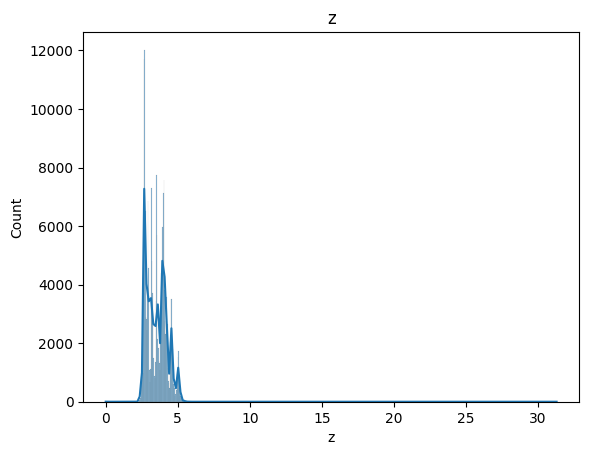

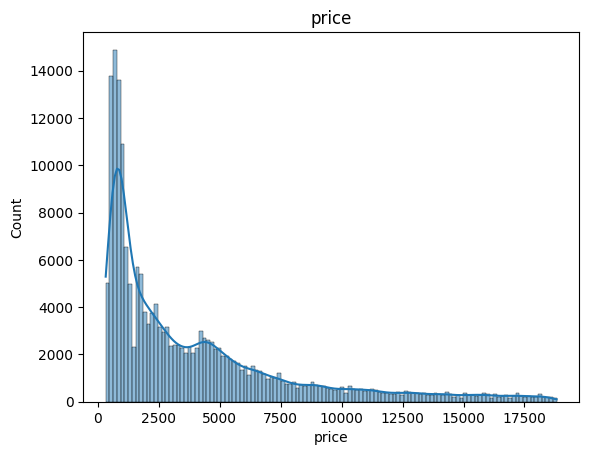

In [20]:
# seaborn histogram for numerical data with kde
# use kde=True for count plot with figure
# histplot for histogram
for col in df_num.columns:
    sns.histplot(df_num[col], kde=True)
    plt.title(col)
    plt.show()


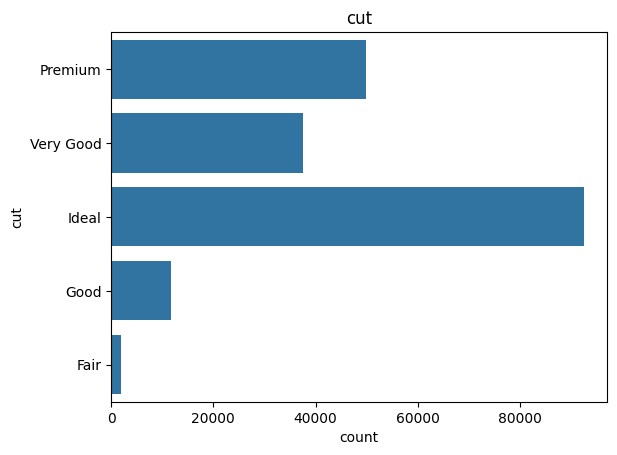

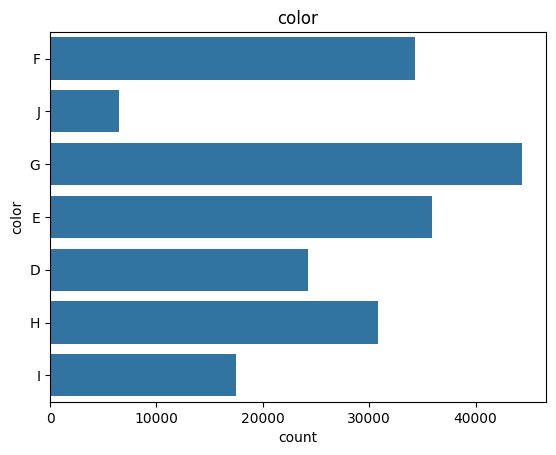

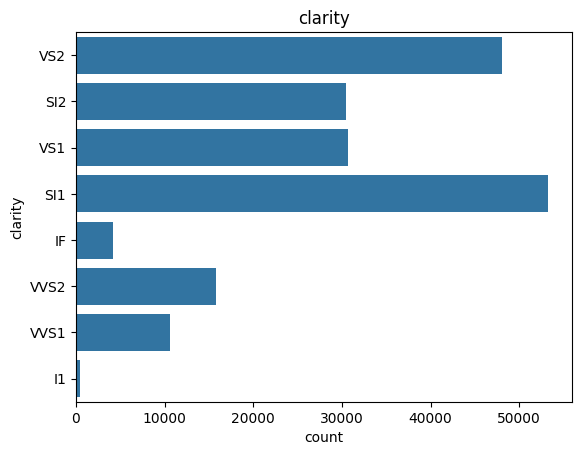

In [21]:
# can plat the graph for categorical data
for col in df_cat.columns:
    sns.countplot(df_cat[col])
    plt.title(col)
    plt.show()

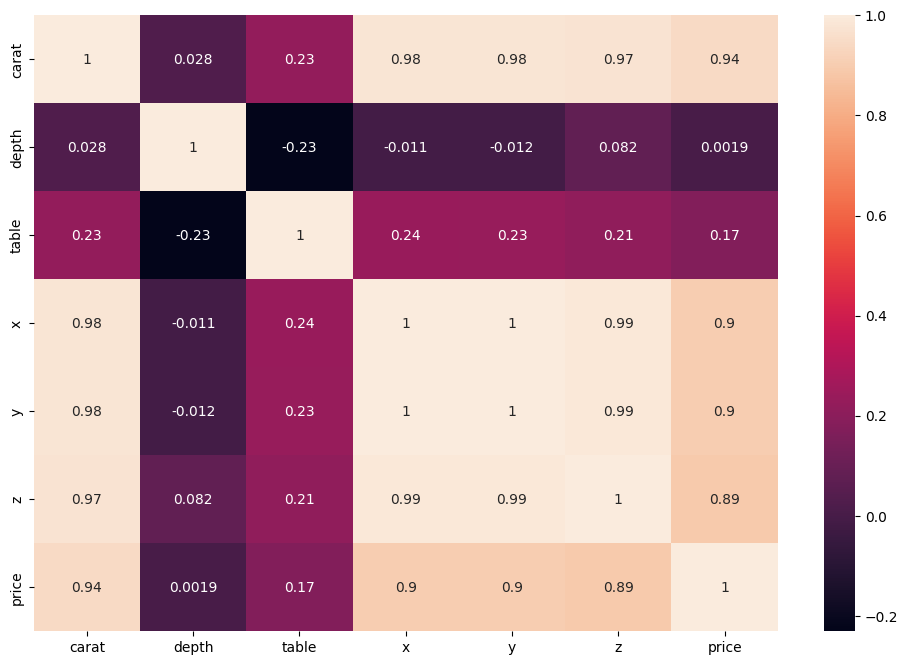

In [23]:
# heatmap for correlation between numerical data
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True)
plt.show()


In [24]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [26]:
# encoding the categorical data
# for cut, clarity and color
# map the values to the column
df['clarity'] = df['clarity'].map({'IF': 8, 'VVS1': 7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1': 3, 'SI2': 2, 'I1': 1})
df['cut'] = df['cut'].map({'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1})
# for color we can use label encoder map d=1, e=2, f=3, g=4, h=5, i=6, j=7
df['color'] = df['color'].map({'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7})




In [27]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81,681
